For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from matplotlib.pyplot import figure
random.seed(0)
figure(figsize=(15, 6), dpi=80)
%config Completer.use_jedi=False

<Figure size 1200x480 with 0 Axes>

In [2]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = [random.randrange(0, 20, 1) for i in range(20)]
 
print ("Random number list is : " +  str(X))
print(len(X))

Random number list is : [12, 13, 1, 8, 16, 15, 12, 9, 15, 11, 18, 6, 16, 4, 9, 4, 3, 19, 8, 17]
20


In [4]:
X=np.array(X)
X

array([12, 13,  1,  8, 16, 15, 12,  9, 15, 11, 18,  6, 16,  4,  9,  4,  3,
       19,  8, 17])

In [5]:
y= -2*X+1
y

array([-23, -25,  -1, -15, -31, -29, -23, -17, -29, -21, -35, -11, -31,
        -7, -17,  -7,  -5, -37, -15, -33])

#### Plot your data points. 

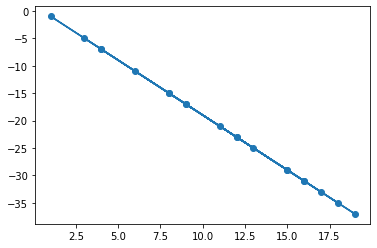

In [6]:
plt.plot(X,y)
plt.scatter(X,y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

# Momentum-based GD

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

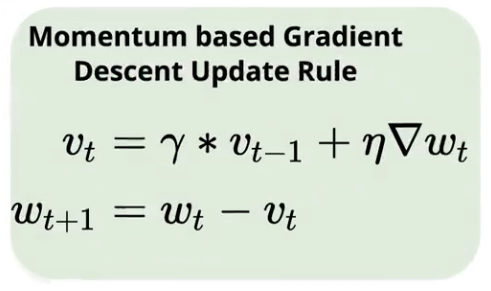

In [7]:
def MomentumBased_GD(X,y,MaxEpochs,Gamma,alpha,convergenceCritria):
    loss=[]
    thetasL0=[]
    thetasL1=[]
    yPredict_Epochs=[]
    x=np.column_stack((np.ones(len(X),dtype=int), X))
    y= y.reshape(-1,1)
    m=(x.shape)[0]
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=0
    v=0
    while epoch < MaxEpochs:
        count+=1
        yPredict= x@thetas
        
        MSEold=(np.sum((yPredict-y)**2))/(2*m)
        
        Grad= (np.transpose(x)@(yPredict-y))/m
        
        v= Gamma*v + (alpha*Grad)
        
        thetas= thetas - v
        thetasL0.append(thetas[0])
        thetasL1.append(thetas[1])
        
        yPredict= x@thetas
        

        MSEnew=(np.sum((yPredict-y)**2))/(2*m)
        
        loss.append(MSEnew)
        yPredict_Epochs.append(yPredict)
        if abs(MSEold-MSEnew)< convergenceCritria:
            print(f"Convergence occure at {count} iterations")
            return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs
        
        epoch+=1

    print(f"We Reach {MaxEpochs} iterations")
    return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs

### Try your function with any input parameterss of your choice.

In [8]:
Score,thetas,yP,loss,thetasL1,thetasL0,yPredict_Epochs=MomentumBased_GD(X,y,1000,0.9,0.0001,0.0001)

Convergence occure at 102 iterations


### Calculate r2 score

In [9]:
Score

0.9978094236249812

### Plot loss vs. epochs

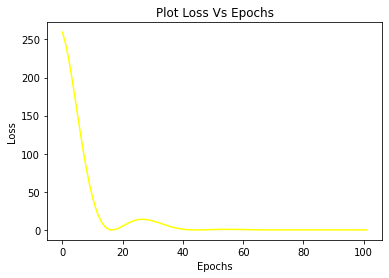

In [10]:
plt.plot(loss , color = 'yellow')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

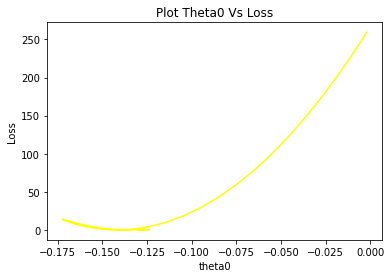

In [11]:
plt.plot(thetasL0 ,loss,color = 'yellow')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

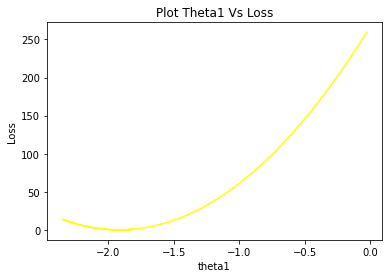

In [12]:
plt.plot(thetasL1 ,loss,color = 'yellow')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta1 Vs Loss")
plt.show()

### Plot all regression lines till converge

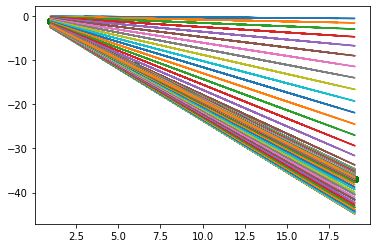

In [13]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

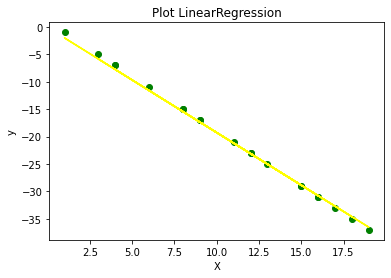

In [14]:
plt.scatter(X,y, color = 'green')
plt.plot(X,yP , color = 'yellow')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

_____________________________

# Nesterov Accelerated GD (NAG)

### Update your Batch GD for one variable  implementation to be NAG and check your results

#### γ takes values between 0 and 1.
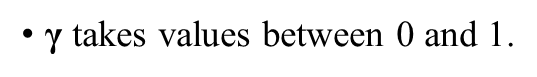

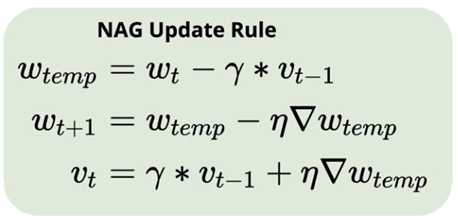

In [15]:
def NAG_GD(X,y,MaxEpochs,Gamma,alpha,convergenceCritria):
    loss=[]
    thetasL0=[]
    thetasL1=[]
    yPredict_Epochs=[]
    x=np.column_stack((np.ones(len(X),dtype=int), X))
    y= y.reshape(-1,1)
    m=(x.shape)[0]
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=0
    v=0
    while epoch < MaxEpochs:
        count+=1
        yPredict= x@thetas
        
        MSEold=(np.sum((yPredict-y)**2))/(2*m)
        
        Grad= (np.transpose(x)@(yPredict-y))/m

        thetas_temp= thetas - Gamma*v
        
        yPredict_temp= x@thetas_temp
        
        Grad_temp= (np.transpose(x)@(yPredict_temp-y))/m
        
        thetas= thetas_temp - (alpha*Grad_temp)
        
        thetasL0.append(thetas[0])
        thetasL1.append(thetas[1])
        
        v= Gamma*v + (alpha*Grad_temp)
        
        yPredict= x@thetas

        MSEnew=(np.sum((yPredict-y)**2))/(2*m)
        
        loss.append(MSEnew)
        yPredict_Epochs.append(yPredict)
        if abs(MSEold-MSEnew)< convergenceCritria:
            print(f"Convergence occure at {count} iterations")
            return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs
        
        epoch+=1

    print(f"We Reach {MaxEpochs} iterations")
    return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs

### Try your function with any input parameterss of your choice.

In [16]:
Score,thetas,yP,loss,thetasL1,thetasL0,yPredict_Epochs=NAG_GD(X,y,1000,0.9,0.0001,0.0001)

Convergence occure at 77 iterations


### Calculate r2 score

In [17]:
Score

0.9977864911267775

### Plot loss vs. epochs

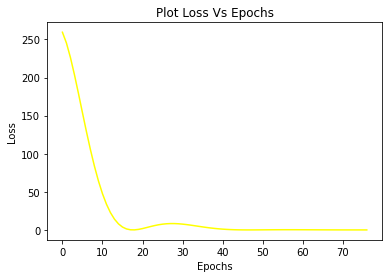

In [18]:
plt.plot(loss , color = 'yellow')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

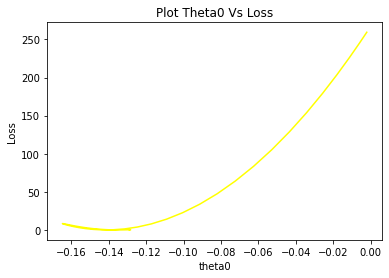

In [19]:
plt.plot(thetasL0 ,loss,color = 'yellow')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

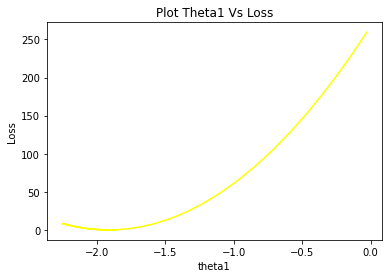

In [20]:
plt.plot(thetasL1 ,loss,color = 'yellow')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta1 Vs Loss")
plt.show()

### Plot all regression lines till converge

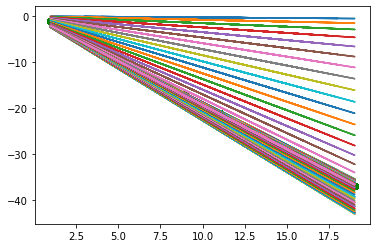

In [21]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

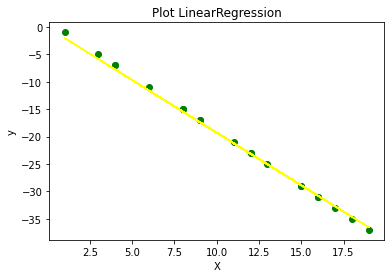

In [22]:
plt.scatter(X,y, color = 'green')
plt.plot(X,yP , color = 'yellow')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

## Congratulations 
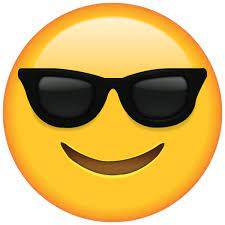